In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = '/Users/dianashevtsova/Desktop/R/python datasets/biden_trump_tweets.csv'
tweets = pd.read_csv(url,
                     parse_dates=['date_utc'], 
                     dtype={'hour_utc':int, 'minute_utc':int, 'id':str}
                    )
print(tweets.head())

                   id         username                  date_utc  hour_utc  \
0  815422340540547073  realDonaldTrump 2017-01-01 05:00:10+00:00         5   
1  815930688889352192  realDonaldTrump 2017-01-02 14:40:10+00:00        14   
2  815973752785793024  realDonaldTrump 2017-01-02 17:31:17+00:00        17   
3  815989154555297792  realDonaldTrump 2017-01-02 18:32:29+00:00        18   
4  815990335318982656  realDonaldTrump 2017-01-02 18:37:10+00:00        18   

   minute_utc  retweets  
0           0     27134  
1          40     23930  
2          31     14119  
3          32      3193  
4          37      7337  


In [4]:
#объединение событий, которые произошли у каждого пользователя в одно время
g = tweets.groupby(['hour_utc', 'minute_utc', 'username'])
tweet_cnt = g.id.nunique()
print(tweet_cnt.head(50))

hour_utc  minute_utc  username       
0         0           JoeBiden           26
                      realDonaldTrump     6
          1           JoeBiden           16
                      realDonaldTrump    11
          2           JoeBiden            6
                      realDonaldTrump    14
          3           JoeBiden            7
                      realDonaldTrump    14
          4           JoeBiden            4
                      realDonaldTrump     9
          5           JoeBiden           24
                      realDonaldTrump     5
          6           JoeBiden            2
                      realDonaldTrump    15
          7           JoeBiden            2
                      realDonaldTrump    10
          8           JoeBiden            9
                      realDonaldTrump    12
          9           JoeBiden            3
                      realDonaldTrump     8
          10          JoeBiden           13
                      realDonaldTrump 

In [7]:
# сводная таблица количества твитов Байдена по часам и минутам 
biden_tweet = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot(index='hour_utc', columns='minute_utc', values='id')
biden_tweet.fillna(0, inplace=True)
print(biden_tweet.iloc[:10,:9])

minute_utc     0     1    2    3    4     5    6    7    8
hour_utc                                                  
0           26.0  16.0  6.0  7.0  4.0  24.0  2.0  2.0  9.0
1           24.0   7.0  5.0  6.0  4.0  19.0  1.0  2.0  6.0
2            3.0   3.0  3.0  0.0  5.0   1.0  4.0  8.0  0.0
3            3.0   3.0  3.0  4.0  5.0   1.0  3.0  5.0  4.0
4            1.0   1.0  1.0  2.0  0.0   0.0  1.0  1.0  1.0
5            1.0   2.0  0.0  0.0  0.0   1.0  0.0  0.0  0.0
6            0.0   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0
10           7.0   2.0  1.0  0.0  0.0   0.0  0.0  0.0  0.0
11           2.0   5.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0
12           4.0   0.0  1.0  1.0  1.0   0.0  1.0  0.0  0.0


In [15]:
biden_tweet = biden_tweet.reindex(range(0,24), axis=0, fill_value=0)
biden_tweet = biden_tweet.reindex(range(0,60), axis=1, fill_value=0).astype(int)
print(biden_tweet.iloc[:10,:9])

minute_utc   0   1  2  3  4   5  6  7  8
hour_utc                                
0           26  16  6  7  4  24  2  2  9
1           24   7  5  6  4  19  1  2  6
2            3   3  3  0  5   1  4  8  0
3            3   3  3  4  5   1  3  5  4
4            1   1  1  2  0   0  1  1  1
5            1   2  0  0  0   1  0  0  0
6            0   0  0  0  0   0  0  0  0
7            0   0  0  0  0   0  0  0  0
8            0   0  0  0  0   0  0  0  0
9            0   0  0  0  0   0  0  0  0


In [16]:
# сводная таблица количества твитов Трампа по часам и минутам 
trump_tweet = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns = 'minute_utc', values='id') 
trump_tweet.fillna(0, inplace=True)
trump_tweet = trump_tweet.reindex(range(0,24), axis=0, fill_value=0)
trump_tweet = trump_tweet.reindex(range(0,60), axis=1, fill_value=0).astype(int)
print(trump_tweet.iloc[:10,:9])


minute_utc   0   1   2   3   4   5   6   7   8
hour_utc                                      
0            6  11  14  14   9   5  15  10  12
1           12  13  14  12  14  13  18   8  10
2           22   8  13   9   8  10  19  13  10
3            6  10   6   8   6  10   8   9   8
4            5   9   4   4   5   8   7   8   8
5            1   1   1   2   3   5   3   2   5
6            1   1   3   1   0   1   1   0   1
7            0   2   0   0   0   0   0   1   2
8            0   0   2   0   1   2   1   2   1
9            0   0   0   0   0   0   0   1   1


/var/folders/7z/8x3_1rnj3_qdl3k7tfyznwg40000gn/T/ipykernel_34283/1302220373.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = b.applymap(lambda v: str(v) if v == b.values.max() else '')
/var/folders/7z/8x3_1rnj3_qdl3k7tfyznwg40000gn/T/ipykernel_34283/1302220373.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labels = b.applymap(lambda v: str(v) if v == b.values.max() else '')


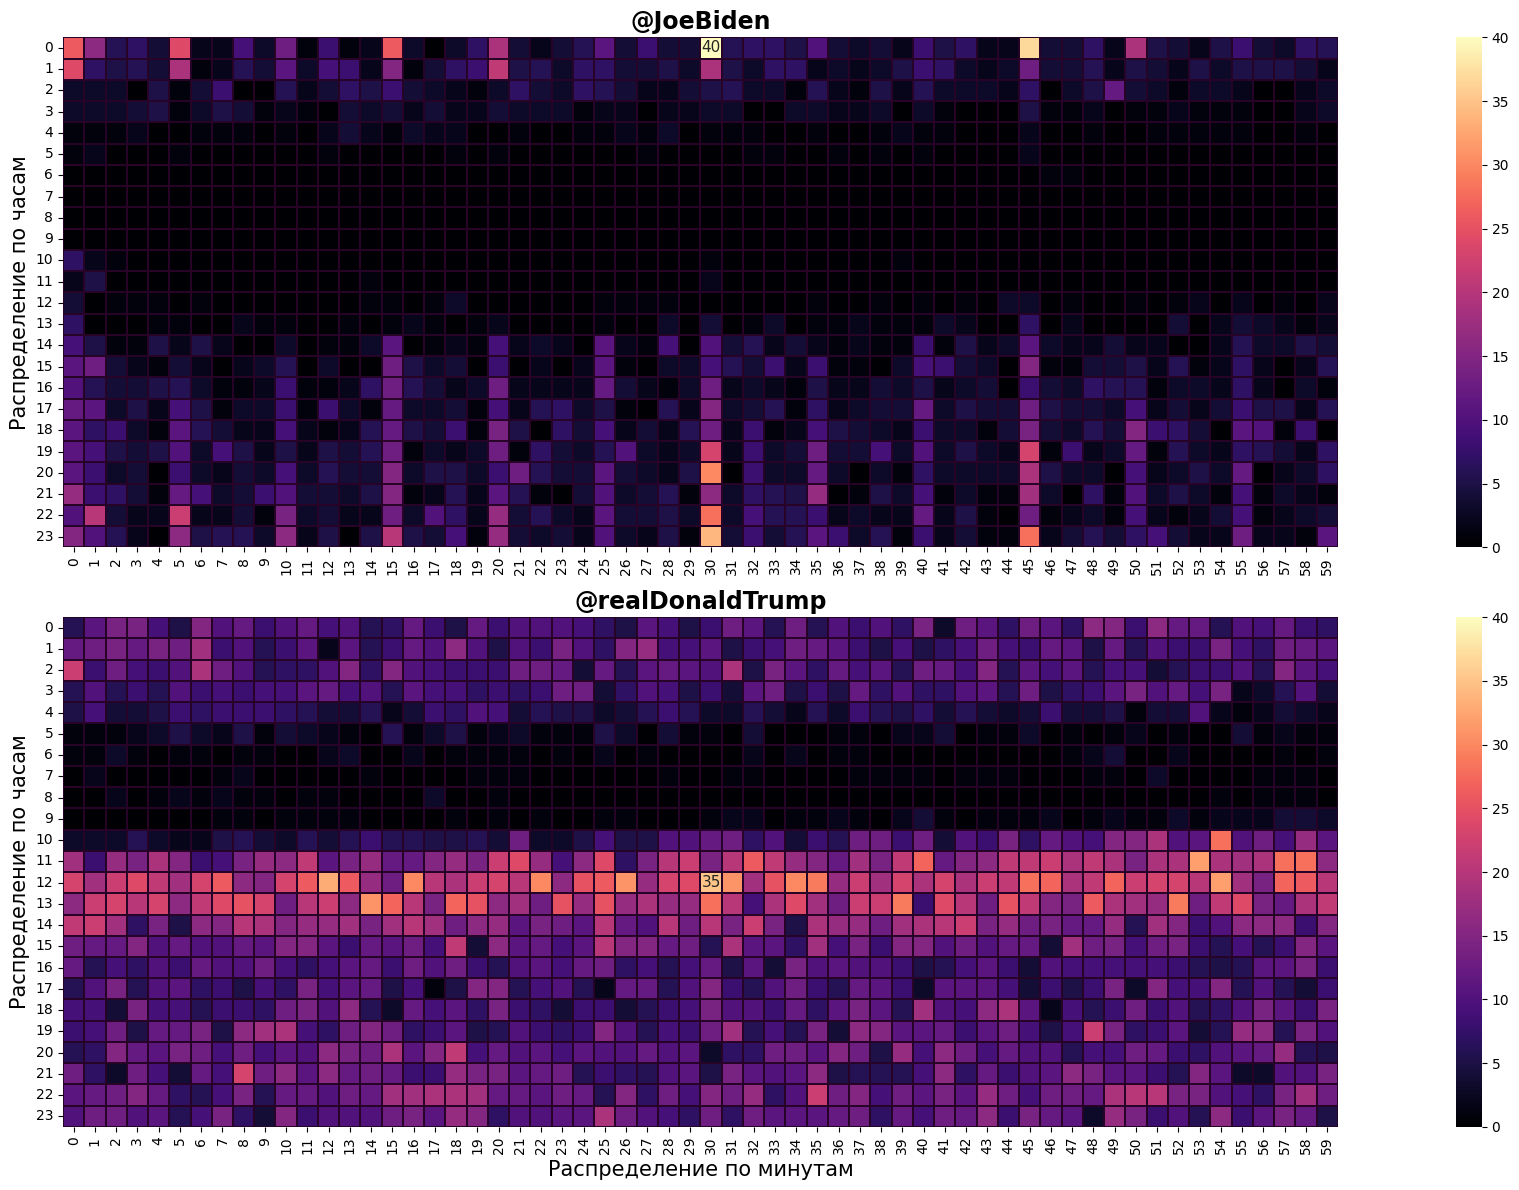

In [33]:
# построение тепловой карты, перебираем все элементы из датасета 

fig, ax = plt.subplots(2, 1, figsize=(24,12))
for a, b in enumerate([biden_tweet, trump_tweet]):
    labels = b.applymap(lambda v: str(v) if v == b.values.max() else '')
    sns.heatmap(b, 
                cmap='magma', 
                annot=labels, 
                annot_kws={'fontsize':11},
                fmt='',
                square=True, 
                vmax=40, 
                vmin=0, 
                linewidth=0.01,
                linecolor='#270427',
                ax=ax[a]
               )
ax[0].set_title('@JoeBiden', fontsize=17, fontweight='bold')
ax[1].set_title('@realDonaldTrump', fontsize=17, fontweight='bold')
ax[0].set_ylabel('Распределение по часам', fontsize=15)
ax[1].set_ylabel('Распределение по часам', fontsize=15)
ax[0].set_xlabel('')
ax[1].set_xlabel('Распределение по минутам', fontsize=15)

plt.tight_layout()
plt.savefig('tweets.png', dpi=120)
    